In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from src.util.noiseutil import OUNoise, PinkNoise, WhiteNoise

Let's see if the implementations for the white noise, pink noise and OU noise.

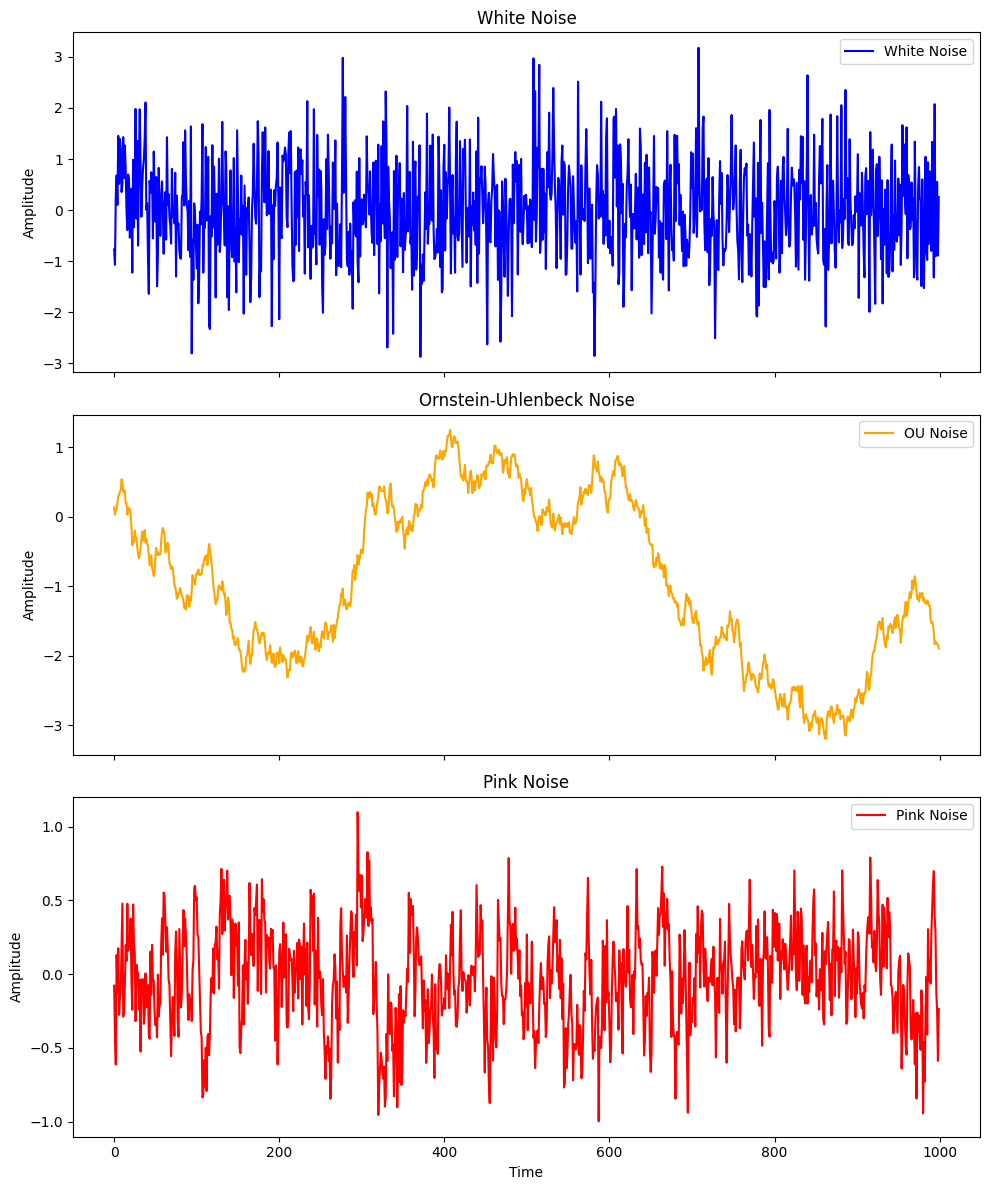

In [2]:
seed = 24
shape = (1,)
theta = 0.15
mean = 0.0
std = 1.0
dt = 1e-2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
np.random.seed(seed)

ouNoise = OUNoise(shape = shape, theta = theta, dt = dt, device = device)
whiteNoise = WhiteNoise(shape = shape, mean = mean, std = std, device = device)
pinkNoise = PinkNoise(shape = shape, device = device)
ouSamples = []
whiteSamples = []
pinkSamples = []
num_samples = 1000

for i in range(num_samples):
    ouRandom = ouNoise.sample()
    whiteRandom = whiteNoise.sample()
    pinkRandom = pinkNoise.sample()

    ouSamples.append(ouRandom.item())
    whiteSamples.append(whiteRandom.item())
    pinkSamples.append(pinkRandom.item())
#
# x_axis = np.arange(num_samples)
# plt.plot(x_axis, ouSamples, label = "OU", alpha = 0.5)
# plt.plot(x_axis, whiteSamples, label = "White", alpha = 0.5)
# plt.plot(x_axis, pinkSamples, label = "Pink", alpha = 0.5)
# plt.legend()
# plt.show()

# Plotting
fig, axs = plt.subplots(3, 1, figsize = (10, 12), sharex = True)

# White Noise
axs[0].plot(whiteSamples, color = "blue", label = "White Noise")
axs[0].set_title("White Noise")
axs[0].set_ylabel("Amplitude")
axs[0].legend()

# OU Noise
axs[1].plot(ouSamples, color = "orange", label = "OU Noise")
axs[1].set_title("Ornstein-Uhlenbeck Noise")
axs[1].set_ylabel("Amplitude")
axs[1].legend()

# Pink Noise
axs[2].plot(pinkSamples, color = "red", label = "Pink Noise")
axs[2].set_title("Pink Noise")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Amplitude")
axs[2].legend()

plt.tight_layout()
plt.show()

Finally, let's verify our implementations finally using the power spectrum and see the density of the frequencies.

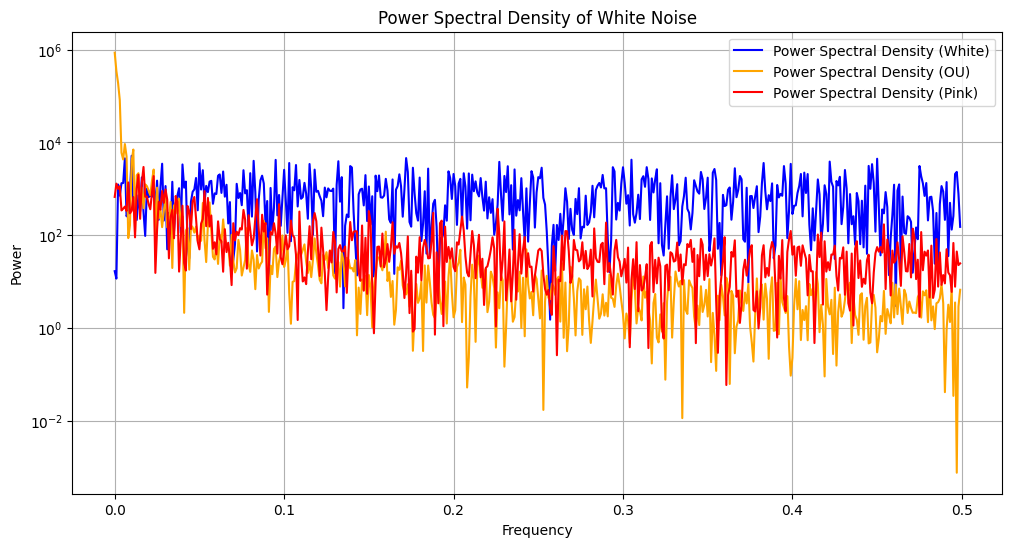

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


def power_spectral_density(noise):
    # Step 01: Compute the FFT
    fft_values = fft(noise)
    frequencies = fftfreq(len(noise), d = 1)

    # Step 02: Compute the Power Spectral Density (PSD)
    psd = np.abs(fft_values) ** 2

    # Step 03: Keep only the positive frequencies (FFT output is symmetric)
    positive_frequencies = frequencies[frequencies >= 0]
    positive_psd = psd[frequencies >= 0]
    return positive_frequencies, positive_psd


white_freq, white_psd = power_spectral_density(whiteSamples)
ou_freq, ou_psd = power_spectral_density(ouSamples)
pink_freq, pink_psd = power_spectral_density(pinkSamples)

# Plot the PSD
plt.figure(figsize = (12, 6))
plt.plot(white_freq, white_psd, label = "Power Spectral Density (White)", color = 'blue')
plt.plot(ou_freq, ou_psd, label = "Power Spectral Density (OU)", color = 'orange')
plt.plot(pink_freq, pink_psd, label = "Power Spectral Density (Pink)", color = 'red')
plt.title("Power Spectral Density of White Noise")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


Seems to work :)